# Self-Driving Car Engineer Nanodegree


## Setup Image Pipeline

I have setup a ipython notebook to work on the Image Pipeline


## Import Packages

In [1]:
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline



## Output Images

Number of images =  8


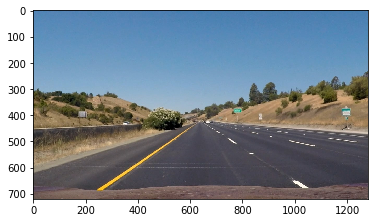

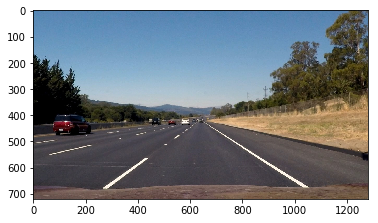

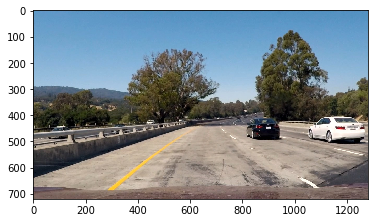

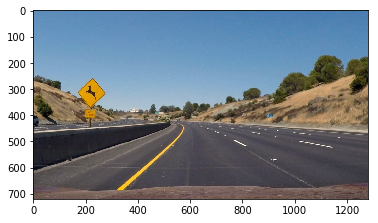

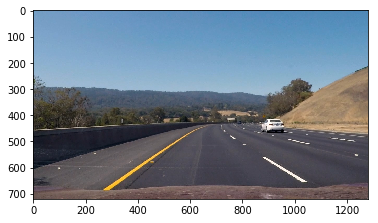

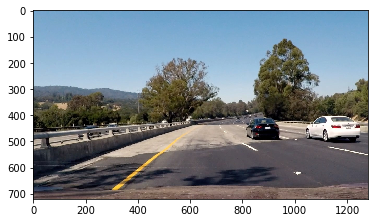

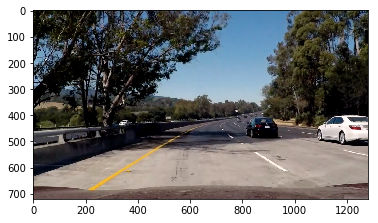

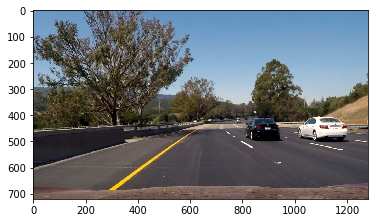

In [2]:
import os
#print(os.listdir("camera_cal/"))

test_images = [mpimg.imread('test_images/' + i) for i in os.listdir('test_images/')]

print("Number of images = ", len(test_images))

for i in range(len(test_images)):
    img = test_images[i]
    
    plt.imshow(img)
    plt.show()


In [3]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(30, 100)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=9, mag_thresh=(30, 100)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output



In [4]:
undist_pickle = {}

undist_pickle = pickle.load(open("mtx_dist_pickle.p", "rb"))

mtx = undist_pickle["mtx"]
dist = undist_pickle["dist"]

(720, 1280, 3)
(1280, 720)


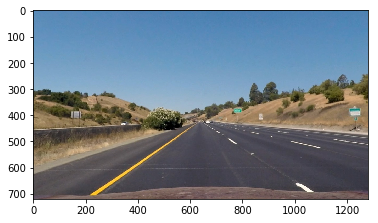

In [5]:
image_t = mpimg.imread('undistorted_images/undist_image0.jpg')
image_t_size = (image_t.shape[1], image_t.shape[0])

print(image_t.shape)
print(image_t_size)

plt.imshow(image_t)
plt.show()

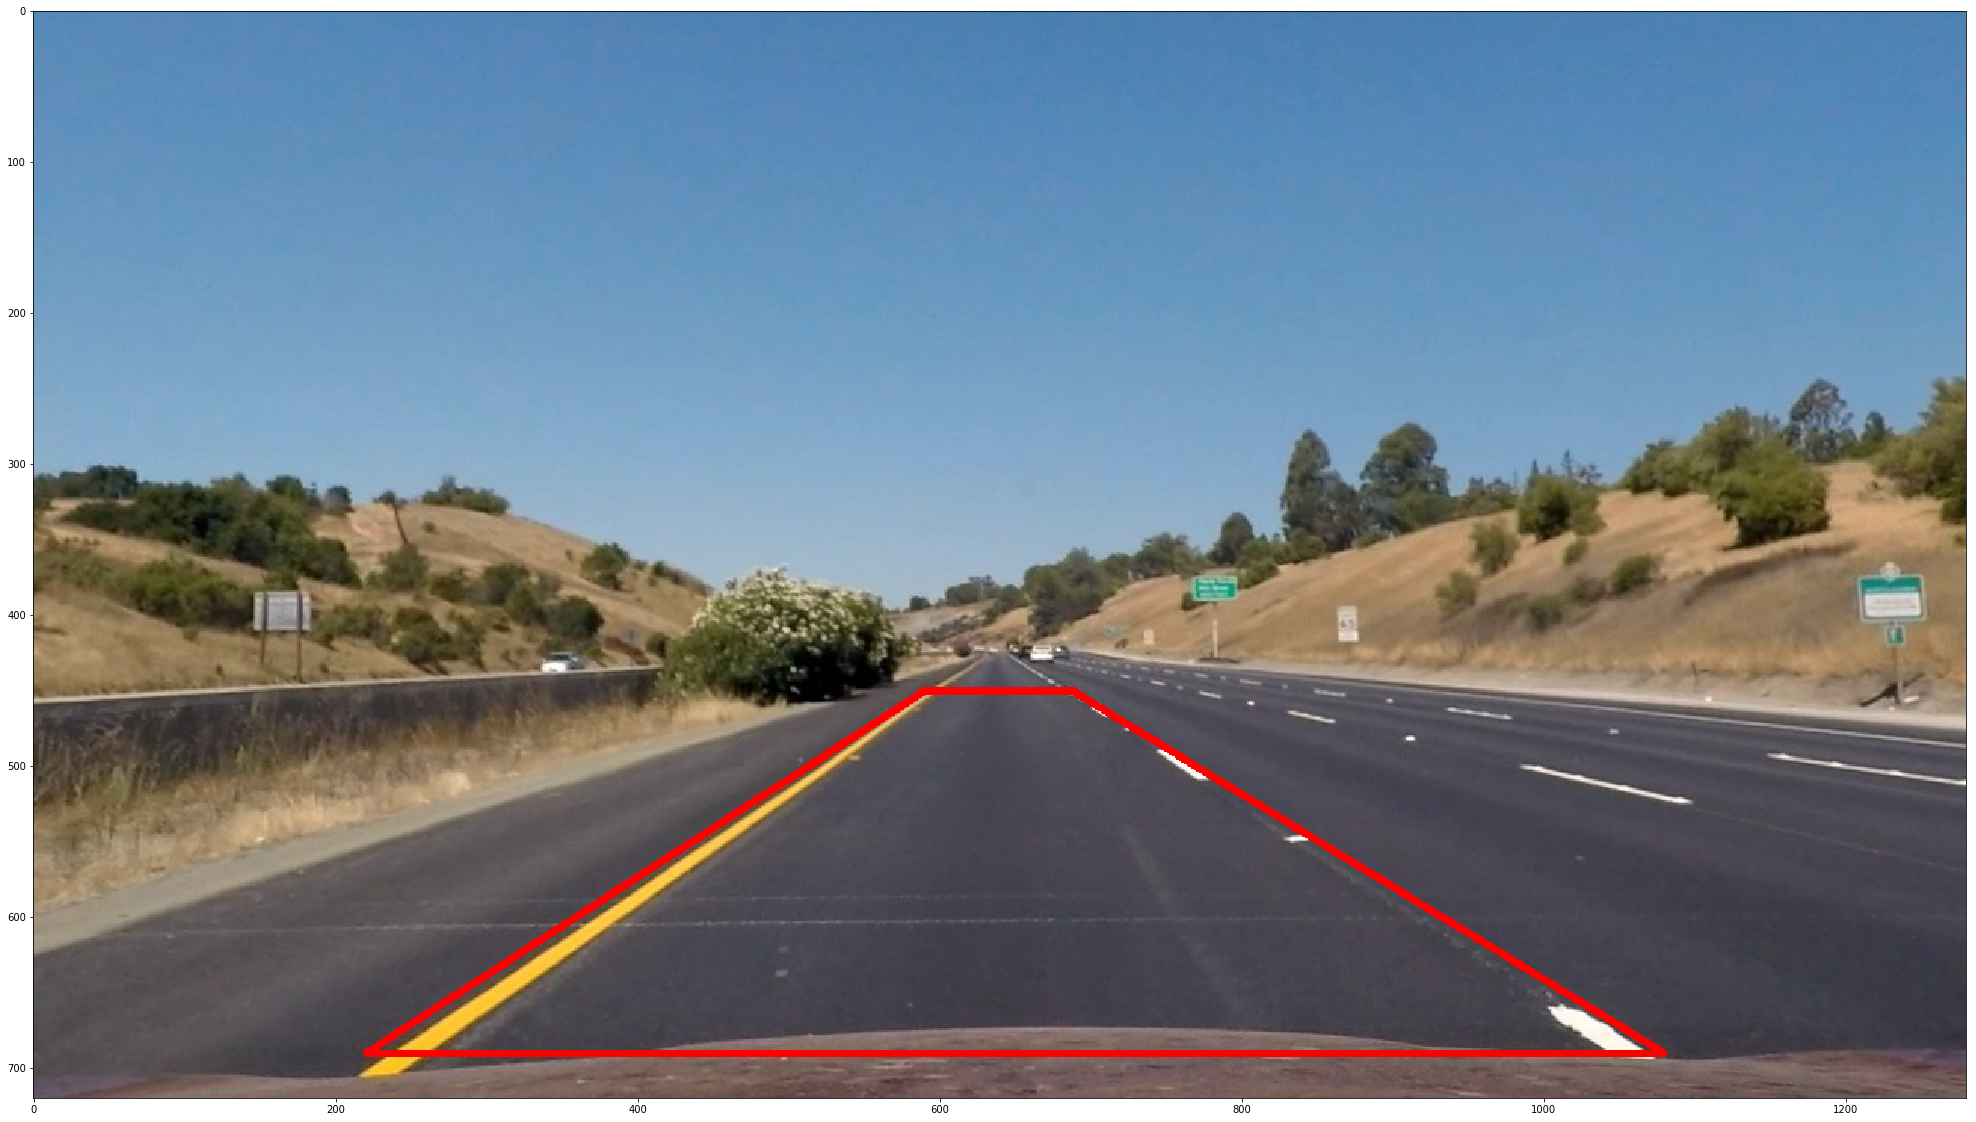

In [6]:
bottom_left_x, bottom_left_y = (220, 690)
#bottom_right_x, bottom_right_y = (1090, 690)
bottom_right_x, bottom_right_y = (1080, 690)

top_left_x, top_left_y = (590, 450)
#top_right_x, top_right_y = (690, 450)
top_right_x, top_right_y = (688, 450)

disp_image  = image_t.copy() 

color = [255, 0, 0]
width = 3
cv2.line(disp_image, (bottom_left_x, bottom_left_y), (top_left_x, top_left_y), color, width)
cv2.line(disp_image, (top_left_x, top_left_y), (top_right_x, top_right_y), color, width)
cv2.line(disp_image, (bottom_right_x, bottom_right_y), (top_right_x, top_right_y), color, width)
cv2.line(disp_image, (bottom_right_x, bottom_right_y), (bottom_left_x, bottom_left_y), color, width)
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(disp_image)

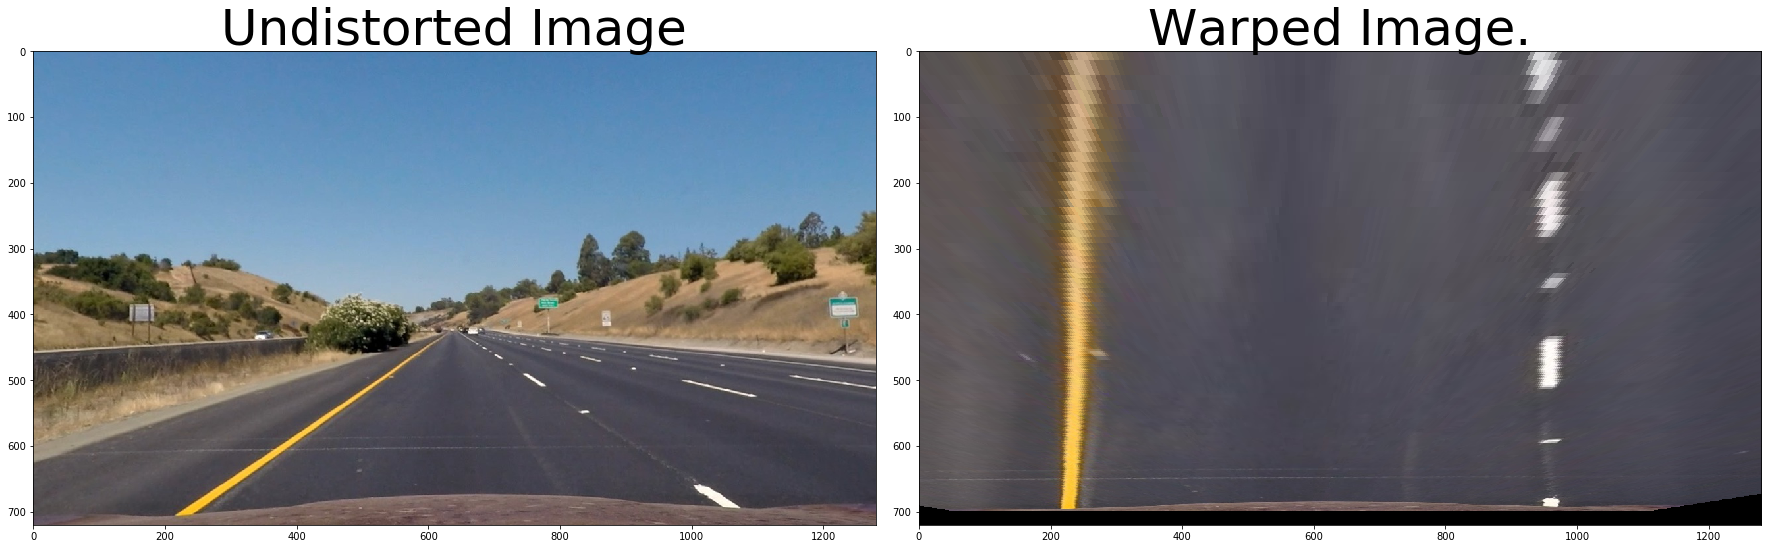

In [7]:
# Grab the image shape
img_size = (image_t.shape[1], image_t.shape[0])
    
leftupperpoint  = [590, 450]
#rightupperpoint = [690, 450]
rightupperpoint = [688, 450]
leftlowerpoint  = [220, 690]
#rightlowerpoint = [1090, 690]
rightlowerpoint = [1080, 690]

src = np.float32([leftupperpoint, leftlowerpoint, rightupperpoint, rightlowerpoint])
dst = np.float32([[200,0], [200,690], [980,0], [980, 690]])


# Given src and dst points, calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)
# Minv is required later in the project
Minv = np.linalg.inv(M)

# Warp the image using OpenCV warpPerspective()
warped = cv2.warpPerspective(image_t, M, img_size, flags=cv2.INTER_NEAREST)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_t)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(warped)
ax2.set_title('Warped Image.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

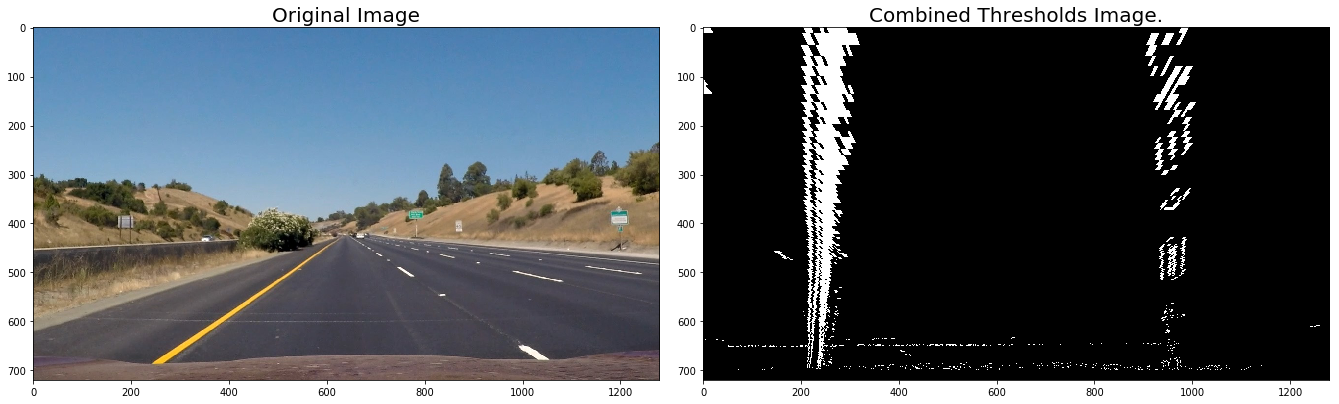

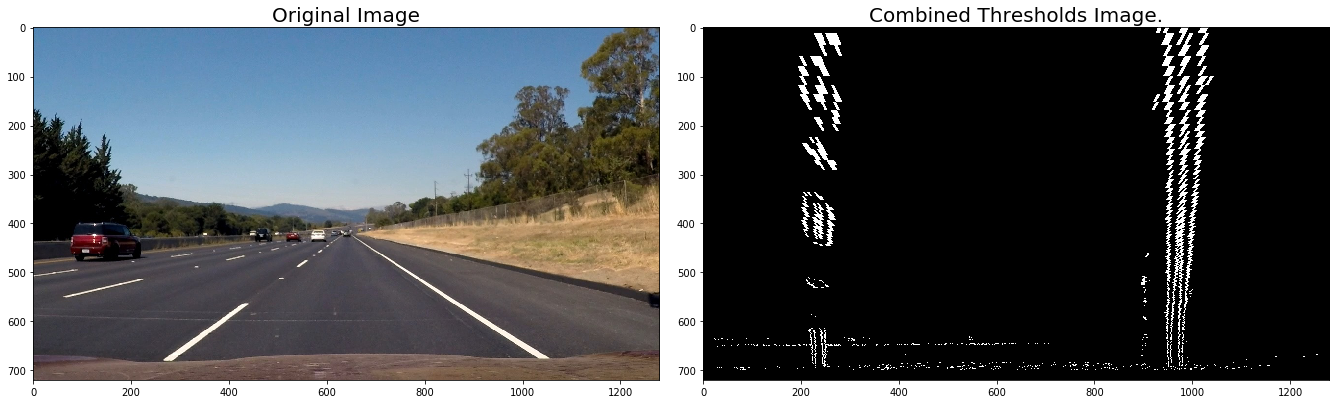

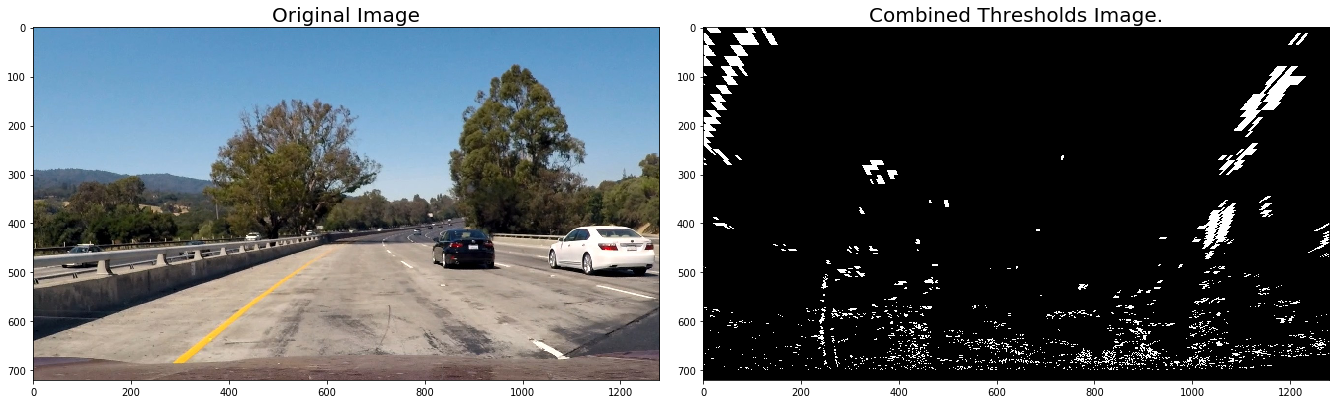

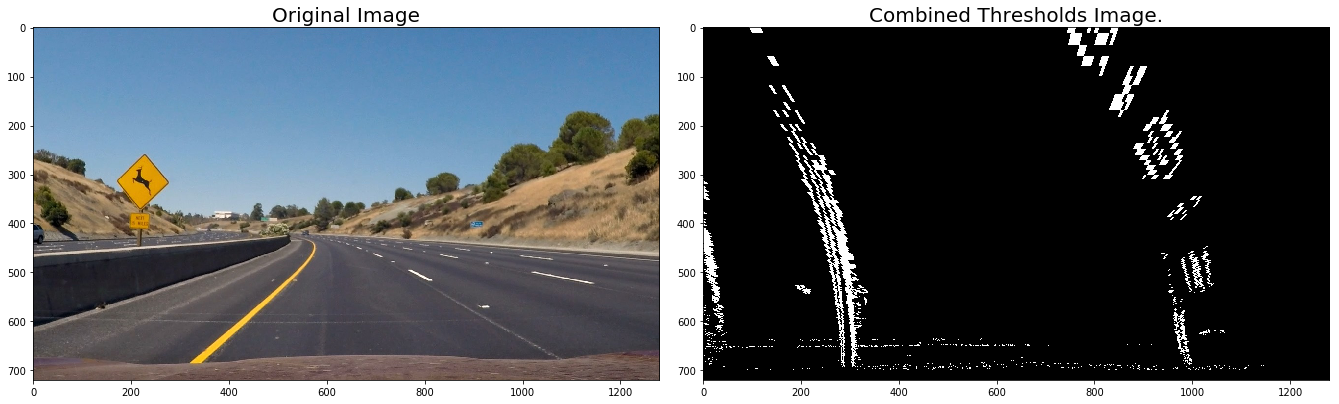

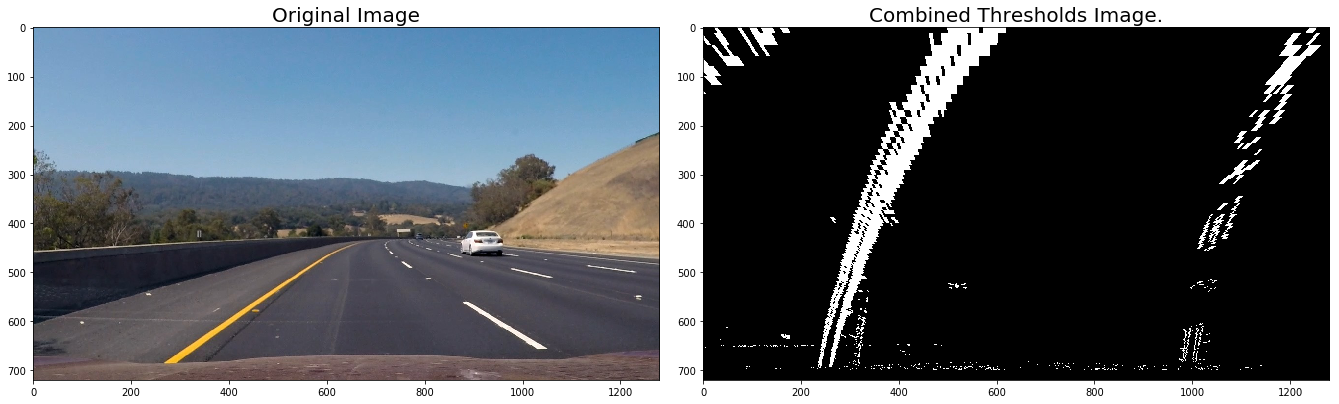

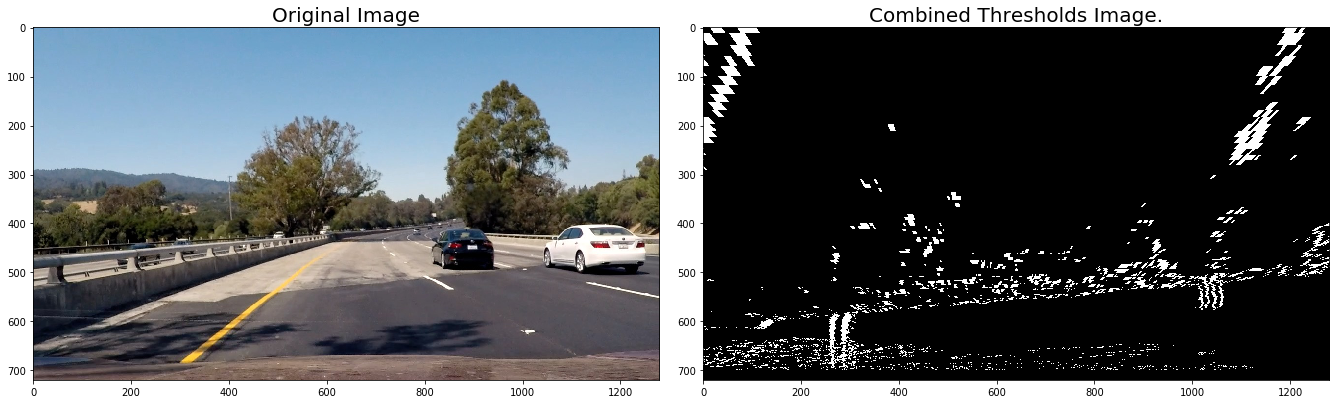

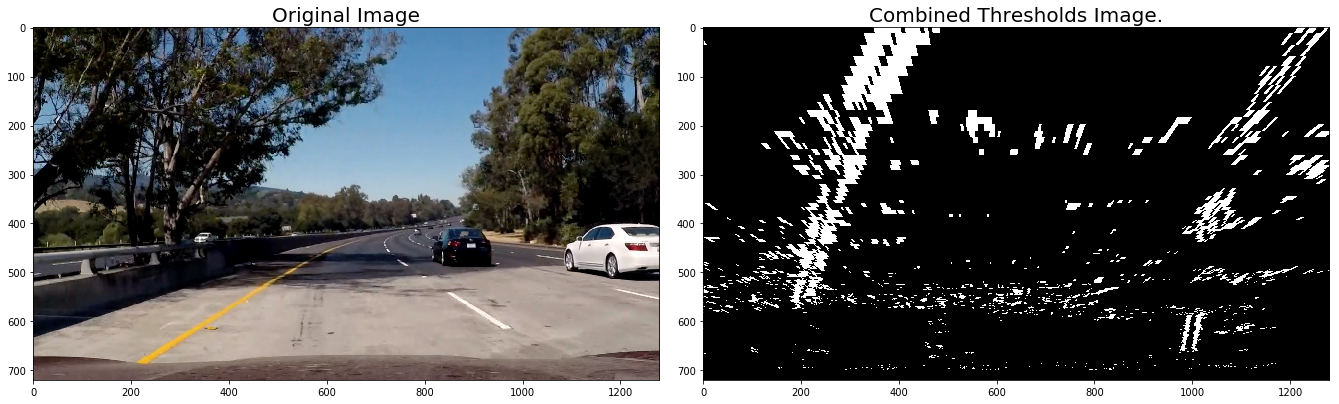

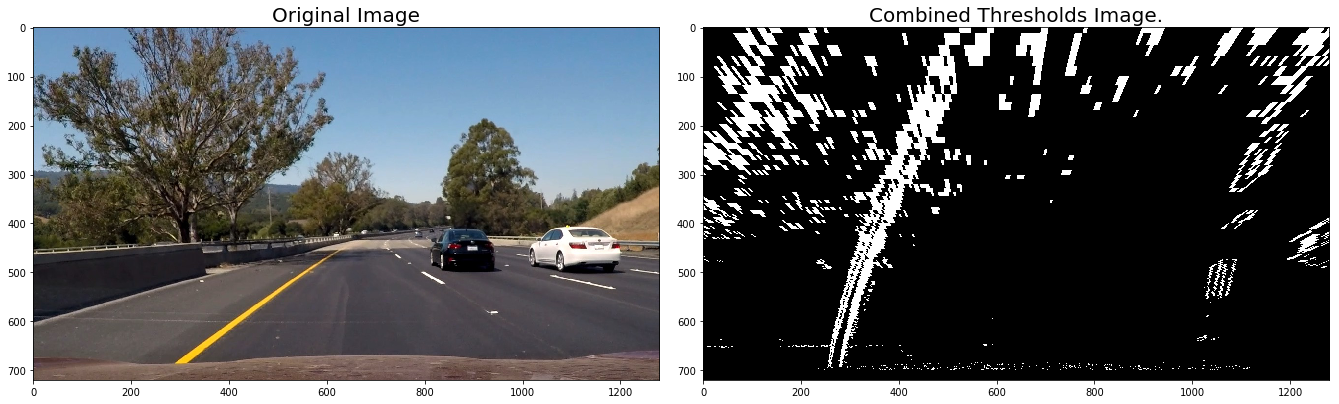

In [8]:
def get_undistorted_combined_warped_binary_image(img):
    undist_image = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(undist_image, orient='x', sobel_kernel=3, thresh=(20, 100))
    grady = abs_sobel_thresh(undist_image, orient='y', sobel_kernel=3, thresh=(20, 100))
    mag_binary = mag_thresh(undist_image, sobel_kernel=3, mag_thresh=(15, 100))
    dir_binary = dir_threshold(undist_image, sobel_kernel=3, thresh=(0.7, 1.4))
    
    hls_binary = hls_select(undist_image, thresh=(100, 255))
    
    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (hls_select == 1)] = 1
    #combined[((gradx == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (hls_select == 1)] = 1
    
    #combined_binary = np.zeros_like(combined)
    #combined_binary[(combined == 1) | (hls_select == 1)] =  1
    
    
    #combined_warped = cv2.warpPerspective(combined, M, (1280, 720), flags=cv2.INTER_LINEAR)
    combined_warped = cv2.warpPerspective(combined, M, (1280, 720), flags=cv2.INTER_NEAREST)
    
    return combined_warped

for i in range(8):
    combined_warped = get_undistorted_combined_warped_binary_image(test_images[i])

    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
    f.tight_layout()
    ax1.imshow(test_images[i])
    ax1.set_title('Original Image', fontsize=20)
    ax2.imshow(combined_warped, cmap='gray')
    ax2.set_title('Combined Thresholds Image.', fontsize=20)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

In [9]:
def finding_the_lines(binary_warped, windows = 9, margin = 100, minpix = 50):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = windows
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    #margin = 100
    # Set minimum number of pixels found to recenter window
    #minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    return left_fit, right_fit, nonzerox, nonzeroy, left_lane_inds, right_lane_inds 

In [10]:
def advanced_find_lines(binary_warped, left_fit, right_fit):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin)))

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))
    

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    #left_fit = np.polyfit(lefty, leftx, 2)
    #right_fit = np.polyfit(righty, rightx, 2)
    
    if len(leftx) == 0:
        left_fit =[]
    else:
        left_fit = np.polyfit(lefty, leftx, 2)
    
    if len(rightx) == 0:
        right_fit =[]
    else:
        right_fit = np.polyfit(righty, rightx, 2)

    return left_fit, right_fit

In [11]:
def visualize_the_lines(binary_warped):
    margin = 100
    left_fit, right_fit, nonzerox, nonzeroy, left_lane_inds, right_lane_inds = finding_the_lines(binary_warped)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    plt.imshow(result)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.show()
    #print(np.mean(right_fitx - left_fitx))

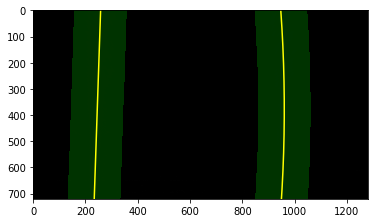

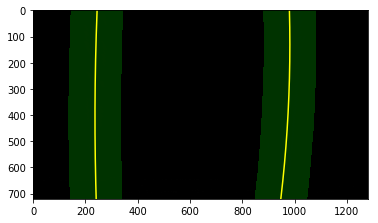

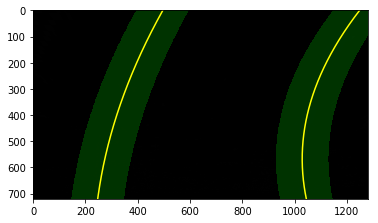

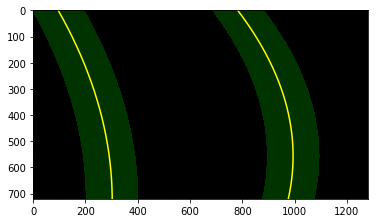

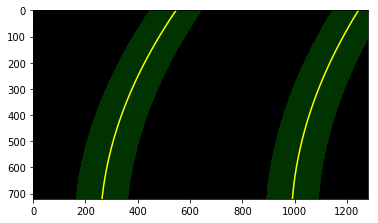

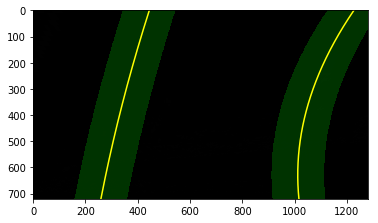

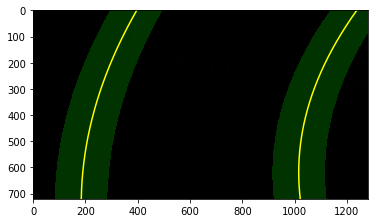

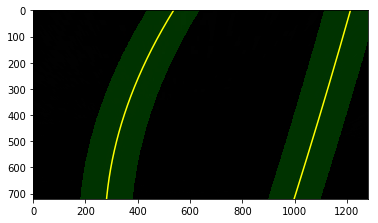

In [12]:
for i in range(8):
    binary_warped = get_undistorted_combined_warped_binary_image(test_images[i])
    visualize_the_lines(binary_warped)

In [13]:
def obtain_curvature(binary_warped, left_fit, right_fit):
    #left_fit, right_fit, nonzerox, nonzeroy, left_lane_inds, right_lane_inds = finding_the_lines(binary_warped)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    y_eval = np.max(ploty)

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    #print(left_curverad, 'm', right_curverad, 'm')
    return left_curverad, right_curverad, ploty, left_fitx, right_fitx

In [14]:
def sanity_check_lines(left_fit, right_fit):
    if len(left_fit) ==0 or len(right_fit) == 0:
        return False

    # calcualtionof slope is 2Ay + B. Use 360 since it is the mid point
    slope_left  = 2*left_fit[0]*360 + left_fit[1]
    slope_right = 2*right_fit[0]*360 + right_fit[1]
    
    slope_diff = np.abs(slope_left - slope_right)
    if (slope_diff > 0.08):
        return False
   
    ploty = np.linspace(0, 719, 720)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    diff = np.mean(right_fitx - left_fitx)
    
    #if ((diff < 710) or (diff > 830)):
    if ((diff < 690) or (diff > 810)):
        return False
    
    return True

In [15]:
class LaneLines():
    def __init__(self):
        self.restart = True
        self.prev_left_fit = None
        self.prev_right_fit = None
        self.current_left_fit = None
        self.current_right_fit = None
        self.frame_count = 0
        self.status_fail_count = 0
        
lanelines = LaneLines()

def find_left_right_lines(binary_warped):
    if (lanelines.restart == True):
        lanelines.current_left_fit, lanelines.current_right_fit, nonzerox, nonzeroy, left_lane_inds, right_lane_inds = finding_the_lines(binary_warped)
        lanelines.restart = False
    else:
        lanelines.current_left_fit, lanelines.current_right_fit = advanced_find_lines(binary_warped, lanelines.prev_left_fit, lanelines.prev_right_fit)
    
    status = sanity_check_lines(lanelines.current_left_fit, lanelines.current_right_fit)
    
    if (status == True):
        lanelines.prev_left_fit,lanelines.prev_right_fit = lanelines.current_left_fit,lanelines.current_right_fit
        lanelines.status_fail_count = 0 
    else:
        lanelines.status_fail_count = lanelines.status_fail_count + 1
        if (lanelines.status_fail_count > 3):
            lanelines.status_fail_count = 0
            lanelines.restart = True
        else:
            lanelines.current_left_fit, lanelines.current_right_fit = lanelines.prev_left_fit,lanelines.prev_right_fit
    
    return lanelines.current_left_fit, lanelines.current_right_fit

In [16]:
def draw_image(test_image):
    undist_image = cv2.undistort(test_image, mtx, dist, None, mtx)
    binary_warped = get_undistorted_combined_warped_binary_image(test_image)
    
    left_fit, right_fit, nonzerox, nonzeroy, left_lane_inds, right_lane_inds = finding_the_lines(binary_warped)
    #left_fit, right_fit = find_left_right_lines(binary_warped)
    
    left_curverad, right_curverad, ploty, left_fitx, right_fitx = obtain_curvature(binary_warped, left_fit, right_fit)
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist_image, 1, newwarp, 0.3, 0)
    
    cv2.putText(result, 'Left radius: {:.0f} m'.format(left_curverad), (50, 50), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 2)
    cv2.putText(result, 'Right radius: {:.0f} m'.format(right_curverad), (50, 100), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 2) 
    
    return result

In [17]:
def pipeline(test_image):
    undist_image = cv2.undistort(test_image, mtx, dist, None, mtx)
    binary_warped = get_undistorted_combined_warped_binary_image(test_image)
    
    left_fit, right_fit = find_left_right_lines(binary_warped)
    
    left_curverad, right_curverad, ploty, left_fitx, right_fitx = obtain_curvature(binary_warped, left_fit, right_fit)
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist_image, 1, newwarp, 0.3, 0)
    
    cv2.putText(result, 'Left  radius: {:.0f} m'.format(left_curverad), (50, 50), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 2)
    cv2.putText(result, 'Right radius: {:.0f} m'.format(right_curverad), (50, 100), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 2) 
    
    return result

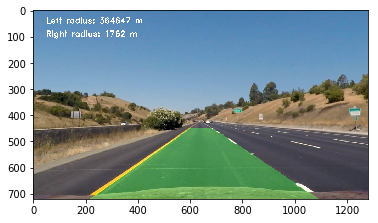

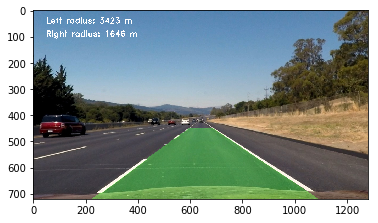

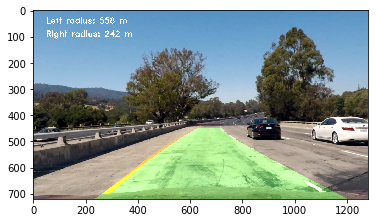

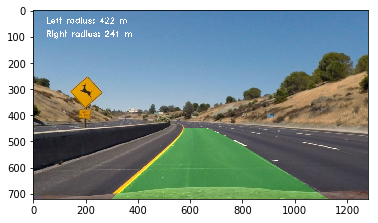

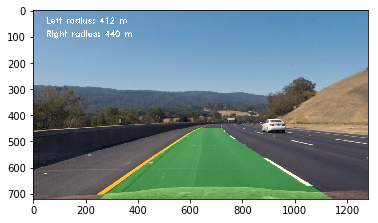

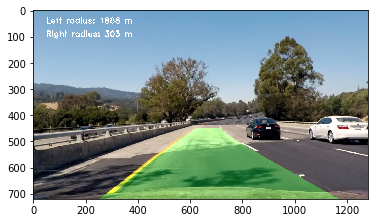

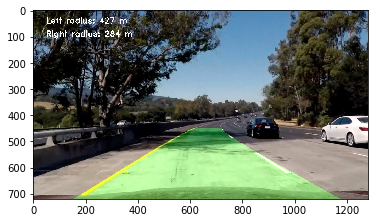

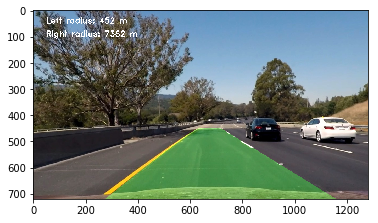

In [18]:
for i in range(8):
    result = draw_image(test_images[i])
    plt.imshow(result)
    plt.show()

In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [20]:
def process_image(image):
    return pipeline(image)

In [21]:
output_video = './output_videos/output_video.mp4'
clip = VideoFileClip('./project_video.mp4')
output_clip = clip.fl_image(process_image)
%time output_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video ./output_videos/output_video.mp4
[MoviePy] Writing video ./output_videos/output_video.mp4


100%|█████████████████████████████████████▉| 1260/1261 [08:42<00:00,  2.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_videos/output_video.mp4 

Wall time: 8min 44s
